name: slovenščina code: sl       confidence:  99.0 read bytes:   586
name: slovenščina code: sl       confidence:  99.0 read bytes:   618
name: slovenščina code: sl       confidence:  99.0 read bytes:   708
name: slovenščina code: sl       confidence:  51.0 read bytes:   470
name: angleščina  code: en       confidence:  48.0 read bytes:   249
name: slovenščina code: sl       confidence:  99.0 read bytes:   478
name: slovenščina code: sl       confidence:  99.0 read bytes:   430
name: slovenščina code: sl       confidence:  99.0 read bytes:   496
name: slovenščina code: sl       confidence:  99.0 read bytes:   458
name: slovenščina code: sl       confidence:  99.0 read bytes:   646
name: slovenščina code: sl       confidence:  99.0 read bytes:   587
name: slovenščina code: sl       confidence:  99.0 read bytes:   284
name: slovenščina code: sl       confidence:  99.0 read bytes:   663
name: slovenščina code: sl       confidence:  99.0 read bytes:   355
name: slovenščina code: sl       c

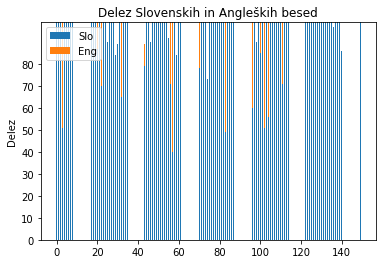

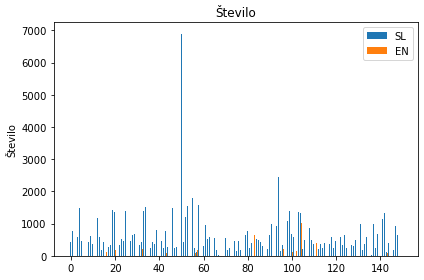

" print('-------------------------------------------------')\n\nfor row in text.words:\n    try:\n        print(row)\n        detector = Detector(str(row), quiet=True)\n        for language in detector.languages:\n            if language.code != 'un':\n                print(language)\n    except:\n        print('Preskočen.')\nprint('-------------------------------------------------')\nprint(text.entities)\nprint(text.morphemes)\n "

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import polyglot
import os
from polyglot.text import Text, Word
from polyglot.mapping import Embedding
from polyglot.detect import Detector

import nltk
from nltk.corpus import stopwords
import numpy as np
import random






__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'scripts\\data\\dogodki_strippedOnlySlov.csv')
df = pd.read_csv(input_file, header = 0)
original_headers = list(df.columns.values)
data_opis = df['opis'].astype('U')


_SAMPLE_SIZE = 150
sampled_list = random.sample(list(data_opis), _SAMPLE_SIZE)

delezByCountry = []

for row in sampled_list:
    try:
        detector = Detector(str(row), quiet=True)
        dog = {}
        for language in detector.languages:
            if language.code != 'un':
                print(language)
                dist = {
                "code": language.code,
                "confidence": language.confidence,
                "count": len(str(row)) * (language.confidence / 100)
                }
                dog[language.code] = dist
        delezByCountry.append(dog)
    except:
        print('Preskočen.')



N = len(delezByCountry)
slDelez = [0] * N
enDelez = [0] * N

slStevilo = [0] * N
enStevilo = [0] * N

for i in range(len(delezByCountry)):
    if('sl' in delezByCountry[i]):
        slDelez[i] = delezByCountry[i]['sl']['confidence']
        slStevilo[i] = delezByCountry[i]['sl']['count']
    if('en' in delezByCountry[i]):
        enDelez[i] = delezByCountry[i]['en']['confidence']
        enStevilo[i] = delezByCountry[i]['en']['count']

    
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, slDelez, width)
p2 = plt.bar(ind, enDelez, width,
             bottom=slDelez)

plt.ylabel('Delez')
plt.title('Delez Slovenskih in Angleških besed')
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Slo', 'Eng'))

plt.show()


x = np.arange(N)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, slStevilo, width, label='SL')
rects2 = ax.bar(x + width/2, enStevilo, width, label='EN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Število')
ax.set_title('Število')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()


#text = Text(row)
#word = Word(row)

#stopwords = stopwords.words('slovene')

#print(stopwords)
#print(row)

""" print('-------------------------------------------------')

for row in text.words:
    try:
        print(row)
        detector = Detector(str(row), quiet=True)
        for language in detector.languages:
            if language.code != 'un':
                print(language)
    except:
        print('Preskočen.')
print('-------------------------------------------------')
print(text.entities)
print(text.morphemes)
 """
